In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np

from plato.visualisation import FigureProcessor, set_plot_defaults, get_palette
from plato.utils import get_abspath

In [8]:
field = "all_sky"

In [9]:
set_plot_defaults()

figure_directory = f"/figures/A_survey_comparison"
save = True

In [10]:
data = pd.read_csv(
    get_abspath() + f"data/processed/{field}_targets.csv",
    low_memory=False,
    usecols=[
        "[Fe/H]",
        "[Fe/H]_apogee",
        "[Fe/H]_galah",
        "logg",
        "logg_apogee",
        "logg_galah",
        "Stellar Type",
        "Mass",
        "Radius",
    ],
)

## Plot [Fe/H] vs High-Res Spectra [Fe/H]

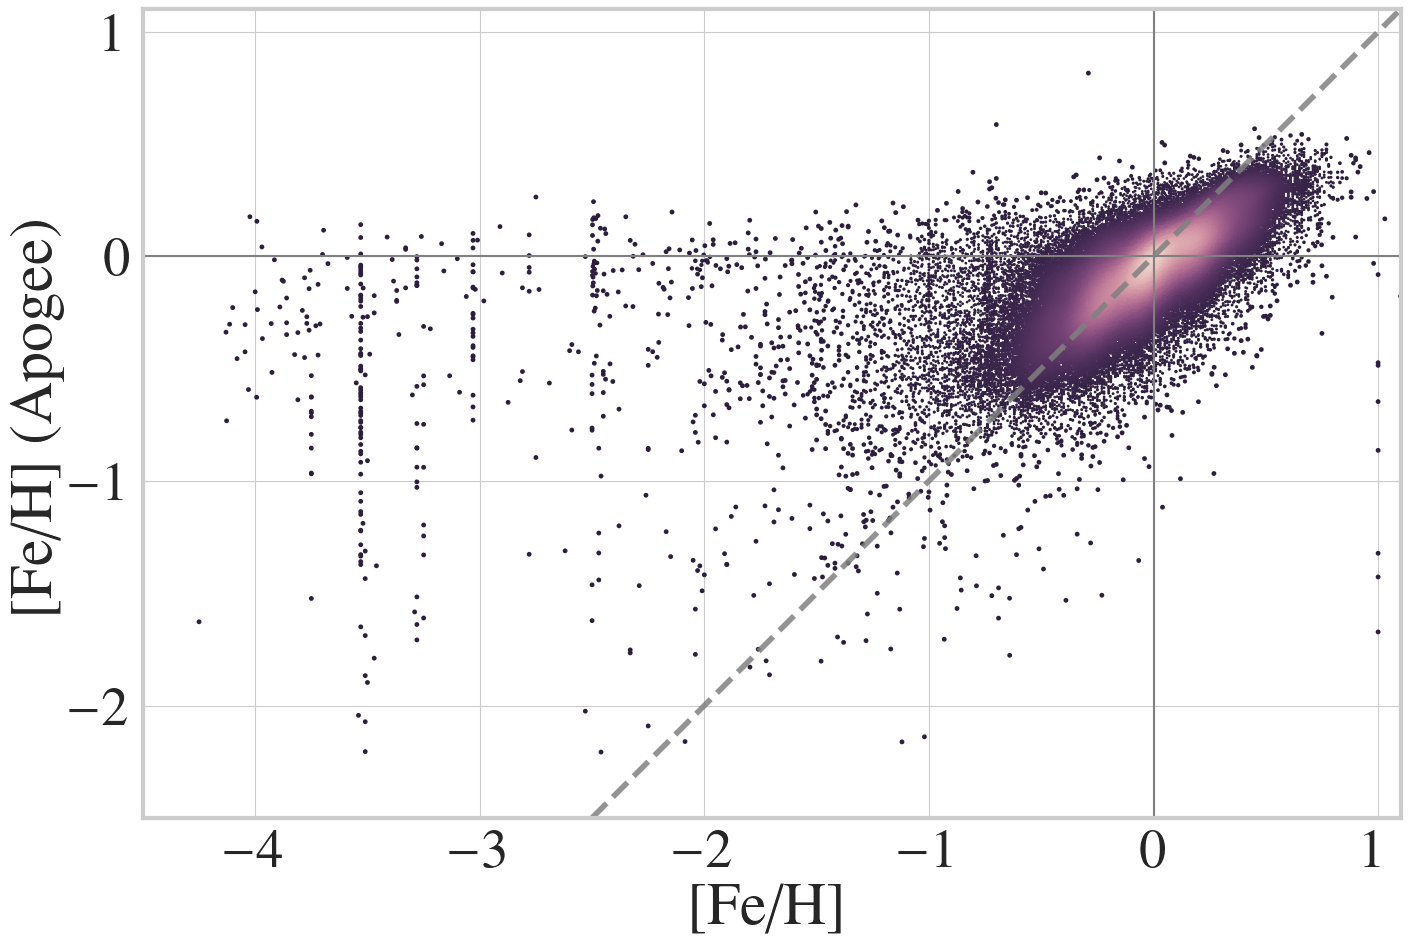

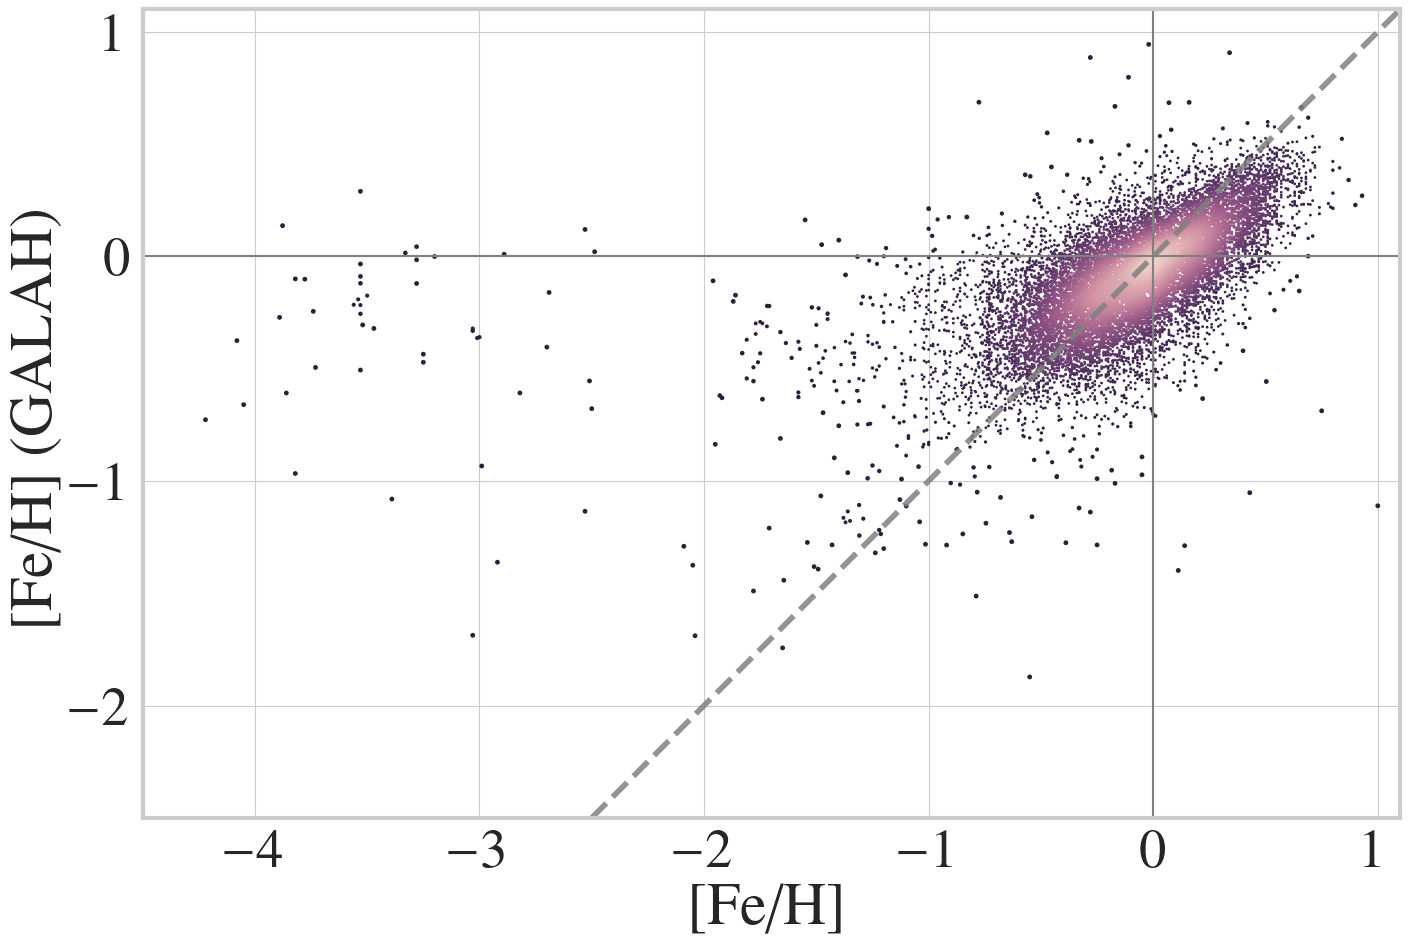

In [11]:
for dataset, name in {"_apogee": "(Apogee)", "_galah": "(GALAH)"}.items():
    fit_data = data[["[Fe/H]", f"[Fe/H]{dataset}"]].dropna()
    kernel = gaussian_kde(fit_data.T)(fit_data.T)

    metallicity_scatter = sns.scatterplot(
        fit_data,
        x="[Fe/H]",
        y=f"[Fe/H]{dataset}",
        c=kernel,
        cmap=get_palette(as_cmap=True, reverse=True),
        linewidth=0,
        s=np.clip(np.sqrt(1 / kernel), 4, 12),
        rasterized=True,
    )
    xlim = (-4.5, 1.1)
    ylim = (-2.5, 1.1)

    metallicity_scatter.axvline(
        0,
        color="grey",
        linewidth=1.5,
    )
    metallicity_scatter.axhline(
        0,
        color="grey",
        linewidth=1.5,
    )
    metallicity_scatter.plot(
        [ylim[0], xlim[1]],
        [ylim[0], xlim[1]],
        color="grey",
        linewidth=4,
        linestyle="--",
        alpha=0.85,
        rasterized=True,
    )

    metallicity_scatter.set_xlim(xlim)
    metallicity_scatter.set_ylim(ylim)
    metallicity_scatter.set_ylabel(f"[Fe/H] {name}")
    metallicity_scatter.set_aspect("equal")

    FigureProcessor(metallicity_scatter).save(
        f"metallicity_scatterplot{dataset}.pdf",
        figure_directory=figure_directory,
        save=save,
    )
    plt.show()

## PLOT LOGG VS HIGH-RES LOGG

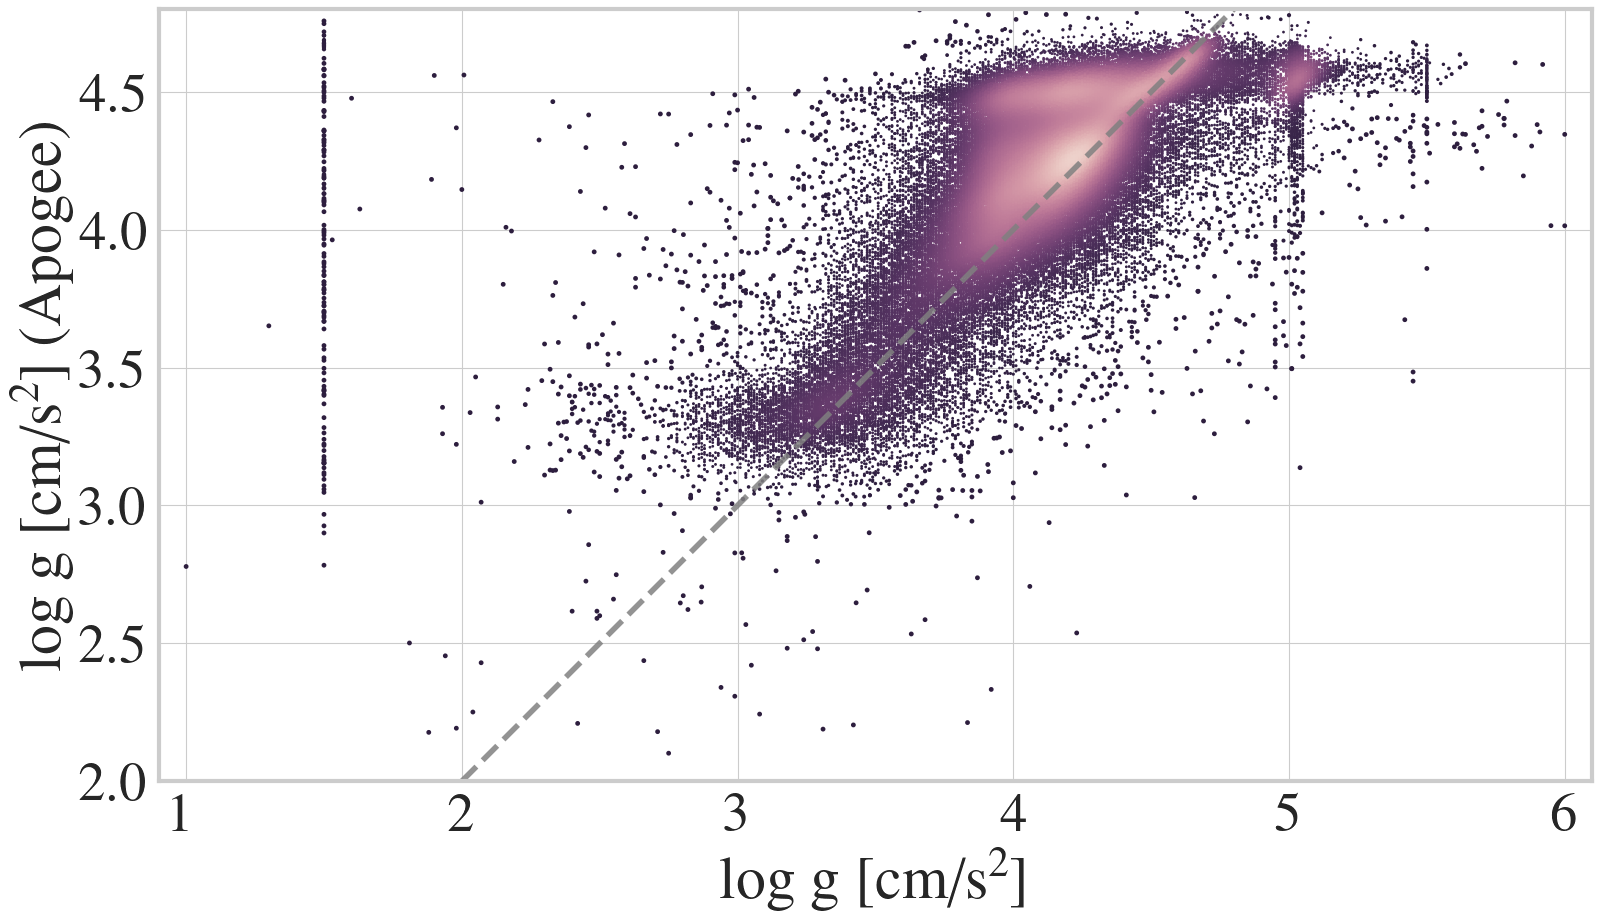

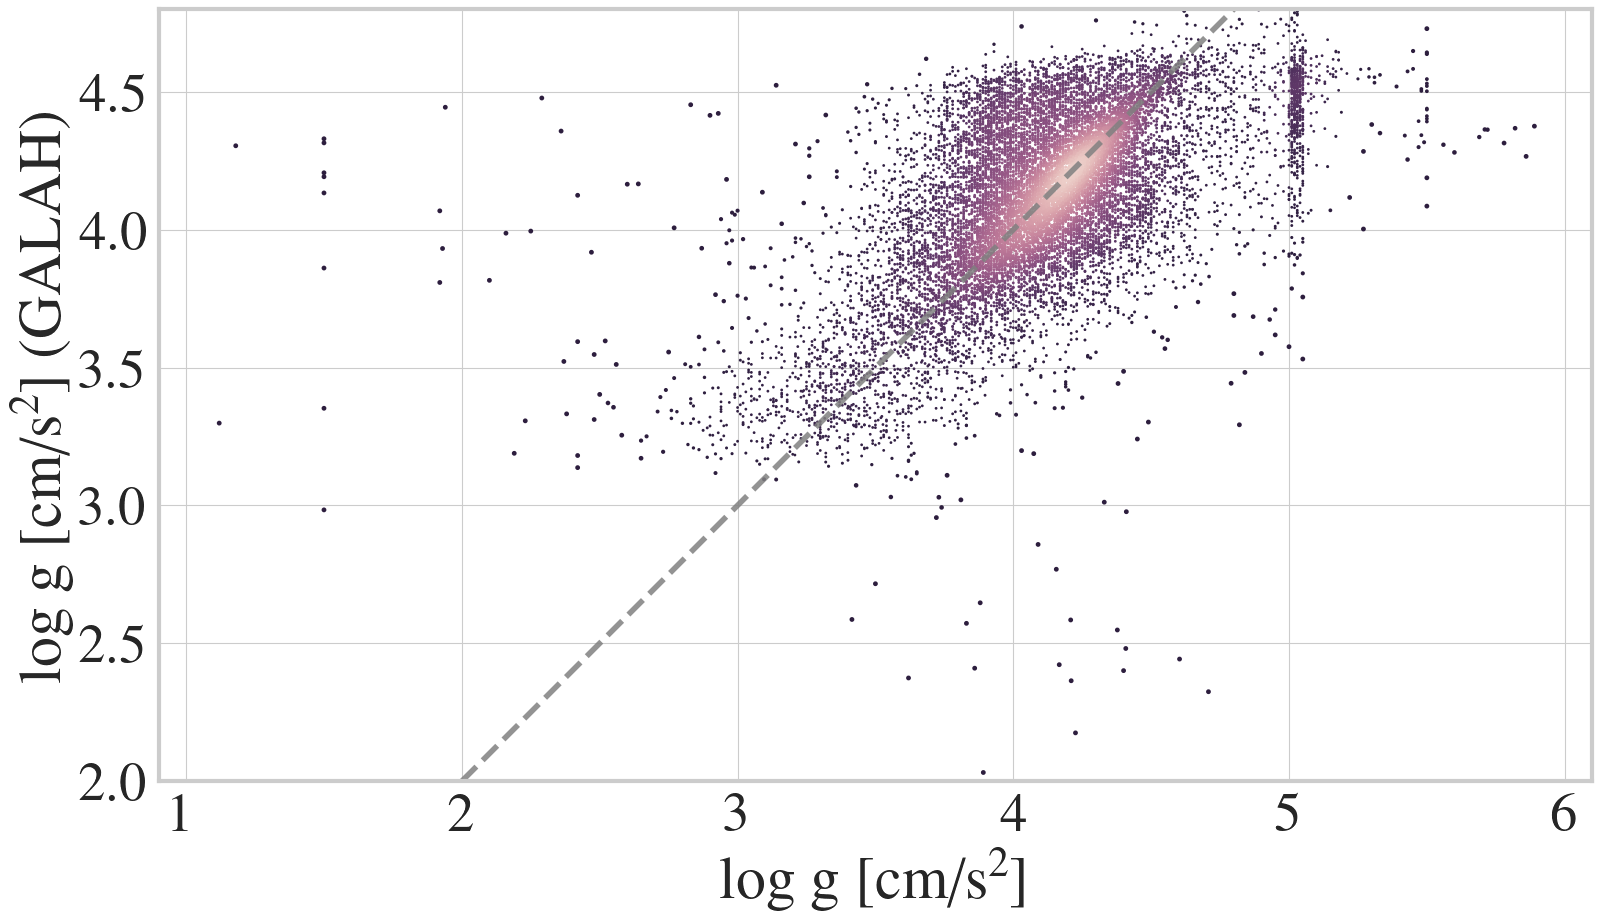

In [12]:
for dataset, name in {"_apogee": "(Apogee)", "_galah": "(GALAH)"}.items():
    fit_data = data[["logg", f"logg{dataset}"]].dropna()
    kernel = gaussian_kde(fit_data.T)(fit_data.T)

    logg_scatter = sns.scatterplot(
        fit_data,
        x="logg",
        y=f"logg{dataset}",
        c=kernel,
        cmap=get_palette(as_cmap=True, reverse=True),
        linewidth=0,
        s=np.clip(np.sqrt(1 / kernel), 4, 12),
        rasterized=True,
    )
    xlim = (0.9, 6.1)
    ylim = (2, 4.8)

    logg_scatter.axvline(
        0,
        color="grey",
        linewidth=1.5,
    )
    logg_scatter.axhline(
        0,
        color="grey",
        linewidth=1.5,
    )
    logg_scatter.plot(
        [ylim[0], xlim[1]],
        [ylim[0], xlim[1]],
        color="grey",
        linewidth=4,
        linestyle="--",
        alpha=0.85,
        rasterized=True,
    )

    logg_scatter.set_xlim(xlim)
    logg_scatter.set_ylim(ylim)
    logg_scatter.set_xlabel(rf"log g [cm/s$^2$]")
    logg_scatter.set_ylabel(rf"log g [cm/s$^2$] {name}")
    logg_scatter.set_aspect("equal")

    FigureProcessor(logg_scatter).save(
        f"logg_scatterplot{dataset}.pdf",
        figure_directory=figure_directory,
        save=save,
    )
    plt.show()